In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("diabetes 2.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [5]:
feature_cols = data.drop('Outcome', axis=1).columns.to_list()
feature_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

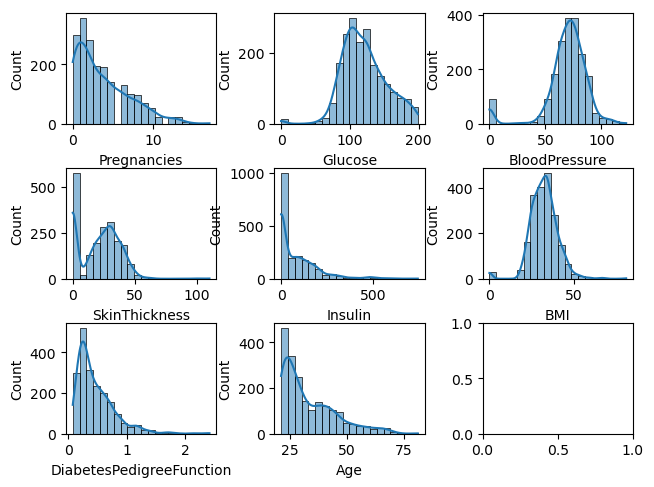

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=data, x=col, ax=ax, bins=20, kde=True)

#### Aside from the obvious skewness of some features it is interesting to note that for certain features, there seems to be an excessive amount of zeroes, it is looking like instead of using NaNs to indicate missing data, they have used zeroes instead

In [7]:
import numpy as np
for col in feature_cols:
    if col == 'Pregnancies':
        continue
    data.loc[data[data[col] == 0].index, col] = np.nan

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47.0,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23.0,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31.0,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21.0,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33.0,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36.0,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42.0,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26.0,1


In [9]:
data.isna().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
print(data[~pd.isna(data.Insulin)].Outcome.value_counts())
print(data[pd.isna(data.Insulin)].Outcome.value_counts())

0    707
1    337
Name: Outcome, dtype: int64
0    609
1    347
Name: Outcome, dtype: int64


#### As we can see the distribution is not really changed with NaN containing rows versus non-Nan containing rows with respect to the target

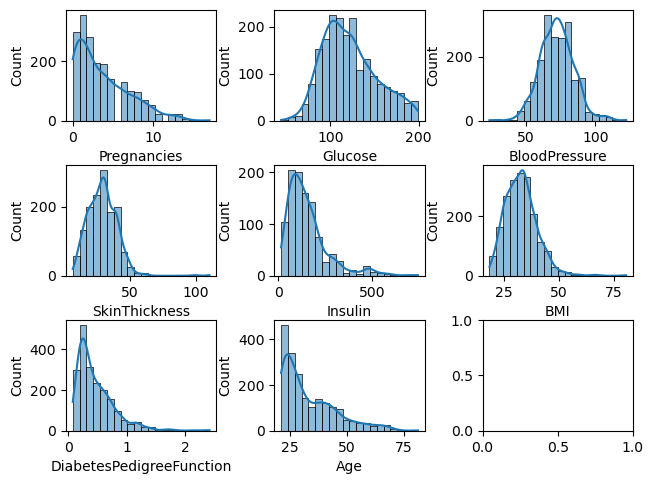

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=data, x=col, ax=ax, bins=20, kde=True)

#### Looking at the distributions now shows only the skewness of certain features, there are no more excessive zeroes

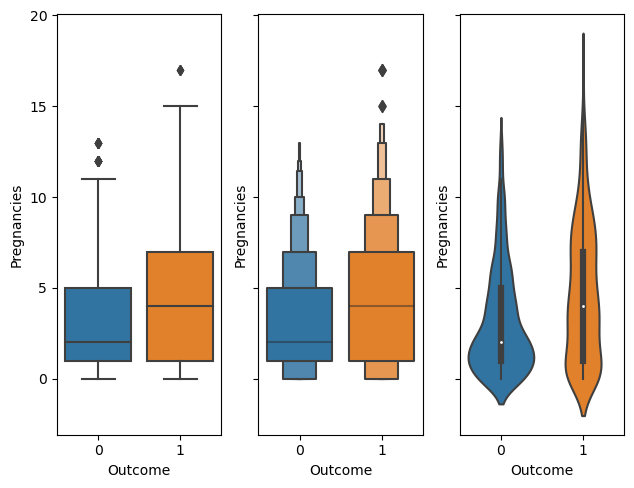

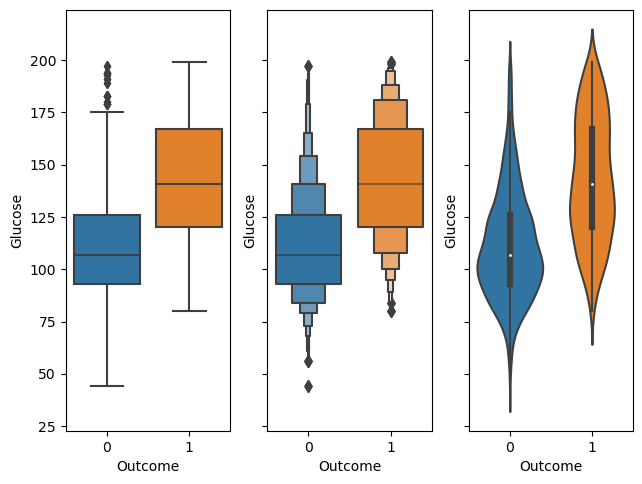

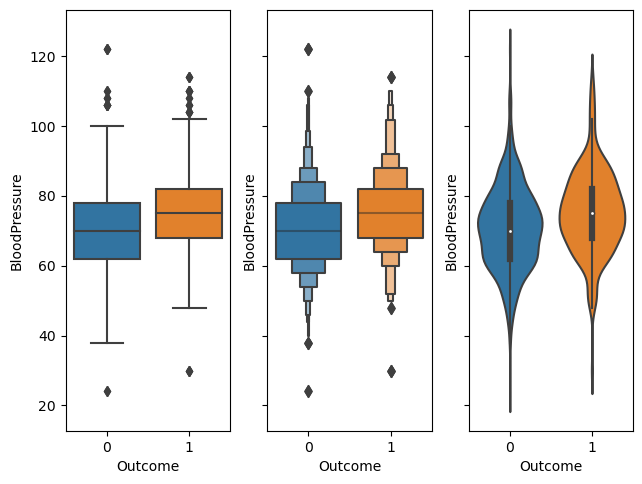

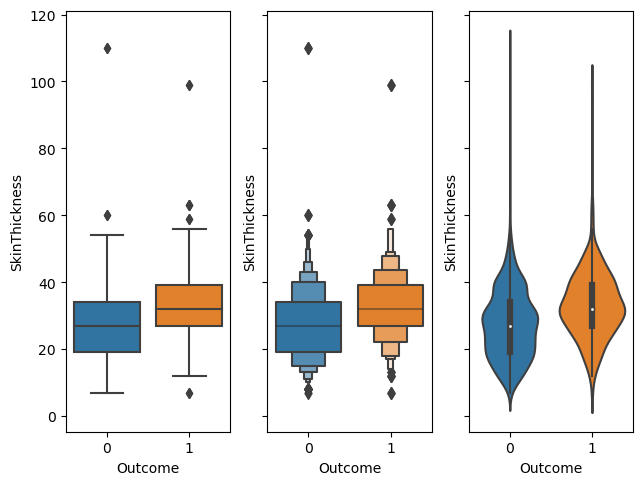

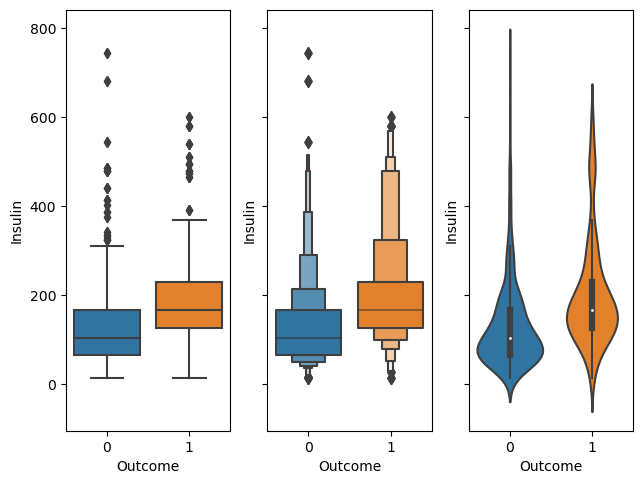

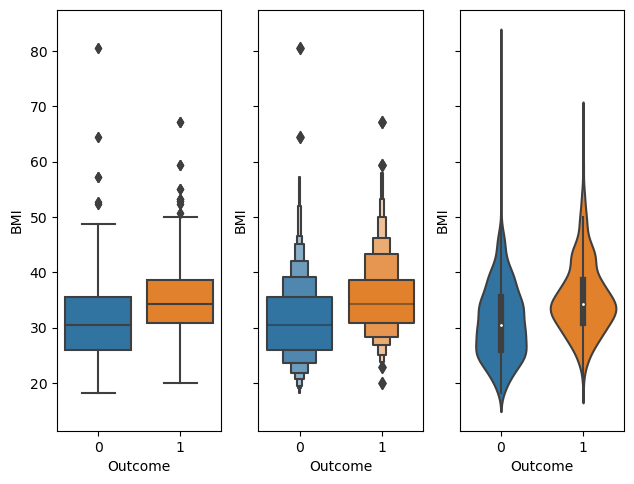

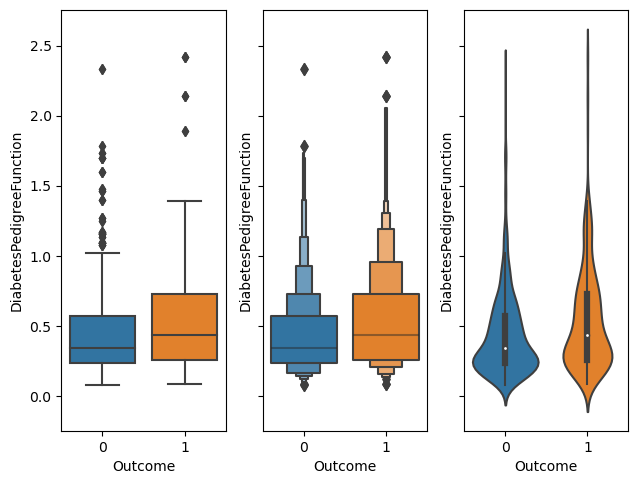

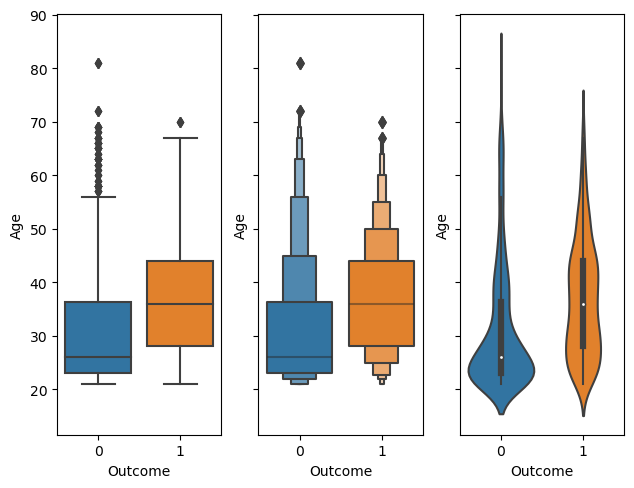

In [14]:
# checking for any abnormal anomalies 
for col in feature_cols:
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
    plt.tight_layout()

    sns.boxplot(data=data, x='Outcome', y=col, ax=axes[0])
    sns.boxenplot(data=data, x='Outcome', y=col, ax=axes[1])
    sns.violinplot(data=data, x='Outcome', y=col, ax=axes[2])

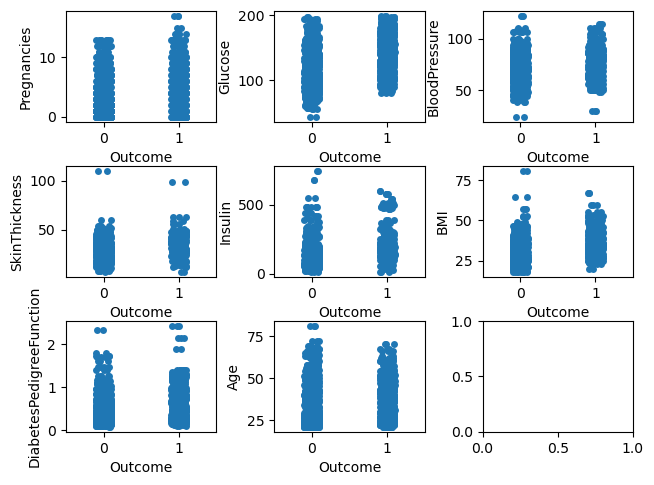

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.stripplot(data=data, x='Outcome', y=col, ax=ax)

#### Can definitely see the relationship between Glucose and being diabetic in these subplots

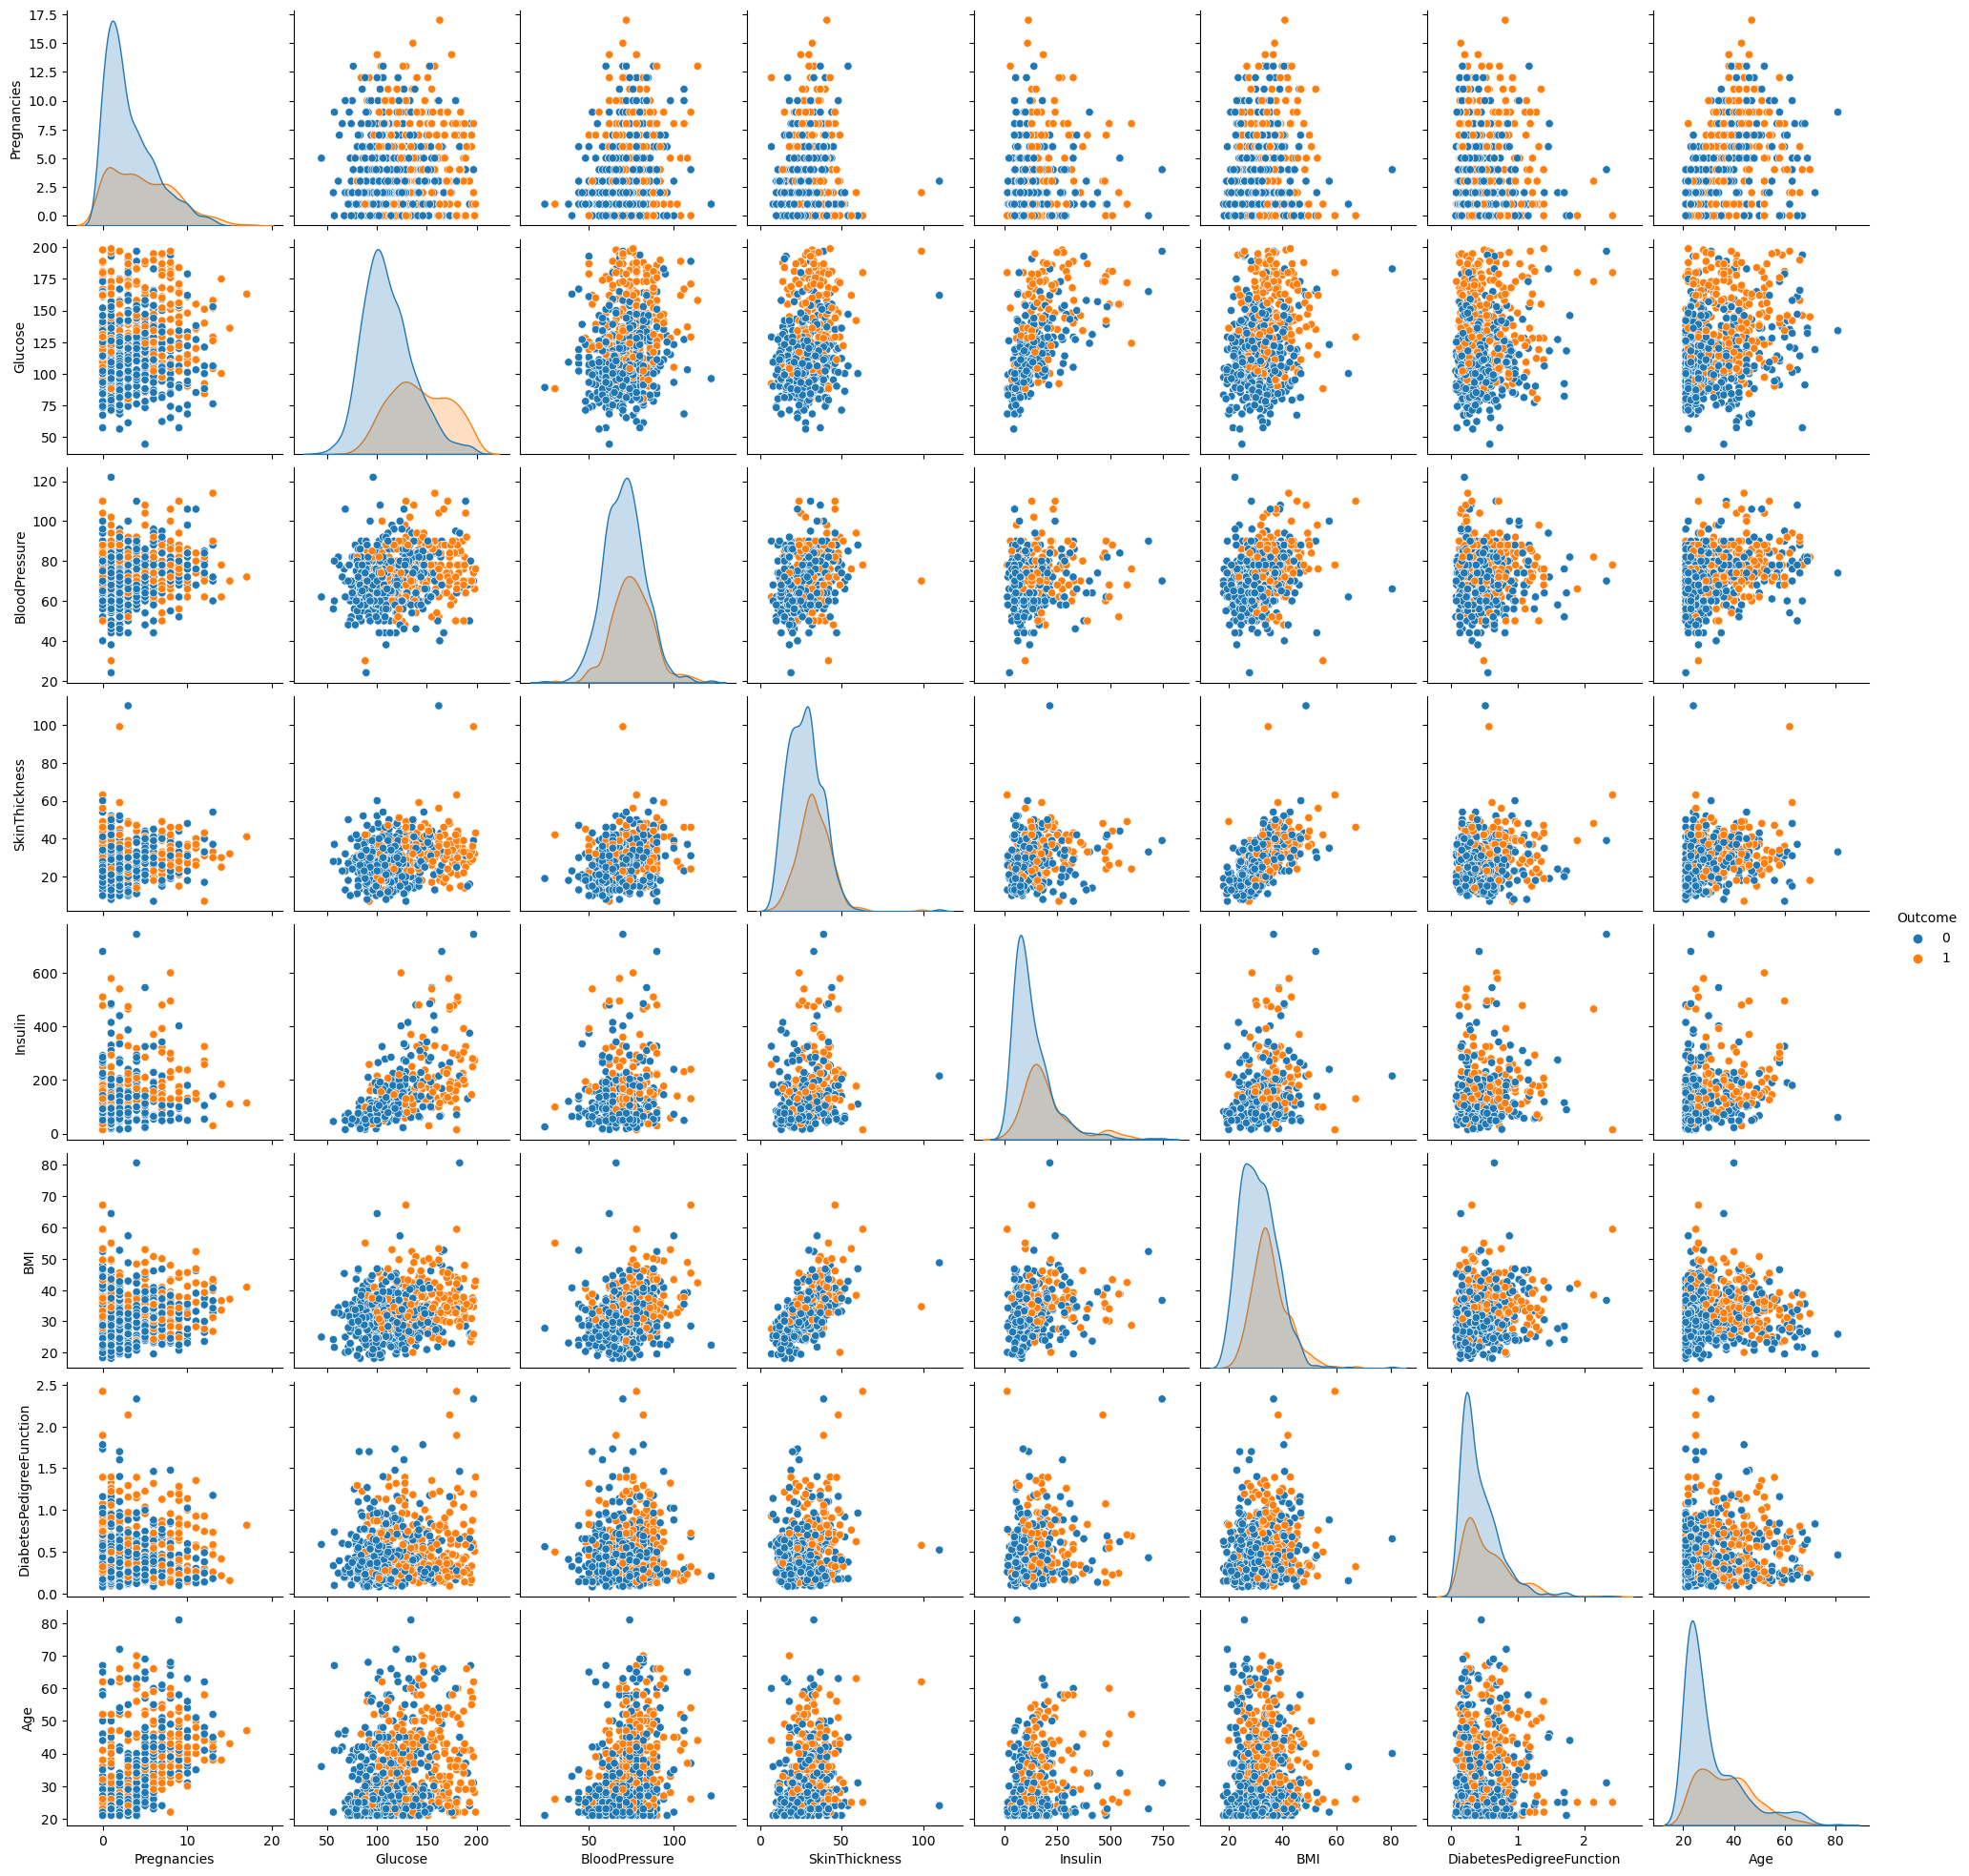

In [18]:
sns.pairplot(data, hue='Outcome')

<Axes: >

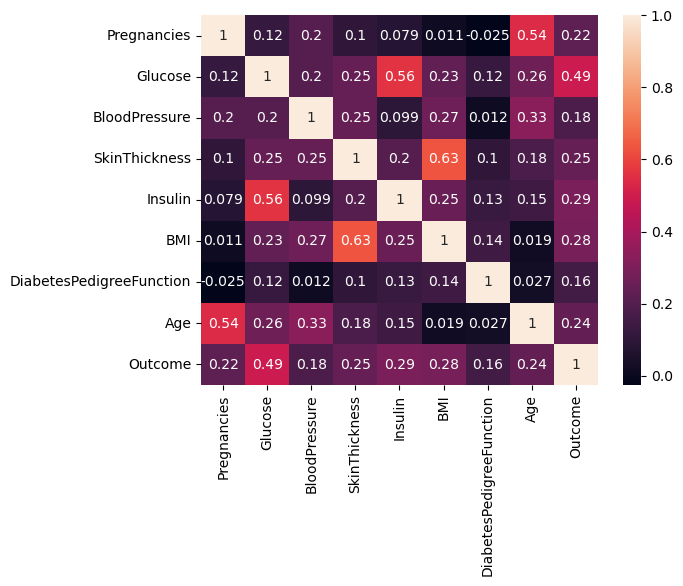

In [19]:
sns.heatmap(data.corr(method='pearson'), annot=True)

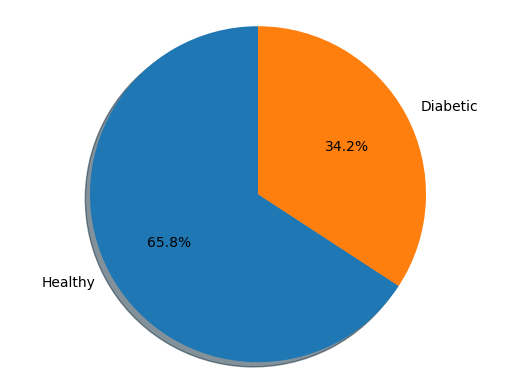

In [20]:
labels = ['Healthy', 'Diabetic']
sizes = [*data.Outcome.value_counts()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax = plt.axis('equal')

#### Dataset is very very slightly imbalanced on healthy labels but not to the point where it would be problematic

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [23]:
le = LabelEncoder()

In [24]:
y = le.fit_transform(y)

In [25]:
from scipy.stats import skew
skewnesses = []

In [27]:
for col in feature_cols:
    skewnesses.append(skew(data[col].values, nan_policy='omit'))

<Axes: title={'center': 'Feature Skewness'}>

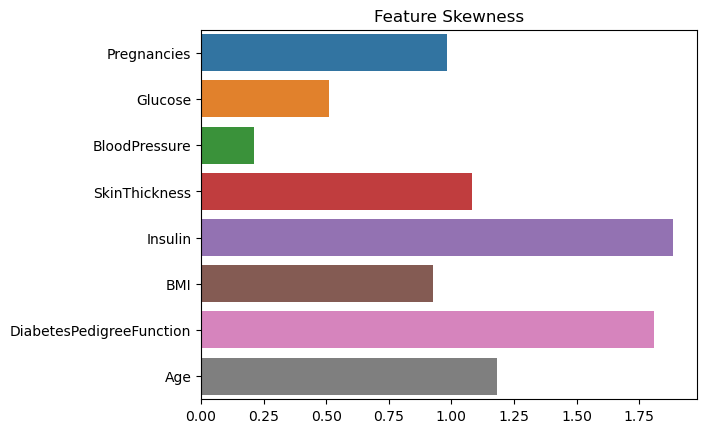

In [28]:
plt.title('Feature Skewness')
sns.barplot(y=feature_cols, x=np.array(skewnesses))

In [29]:
def make_clf_pipeline(alg):
    return Pipeline([
        ('scaler', RobustScaler()),
        ('imputer', KNNImputer(n_neighbors=5, missing_values=np.nan)),
        ('clf', alg)
    ])

In [30]:
classifiers = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Support Vector Classifier', SVC()),
    ('KNN Classifier', KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Extra Tree Classifier', ExtraTreeClassifier()),
    ('GBM Classifier', GradientBoostingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('RF Classifier', RandomForestClassifier(n_jobs=-1, random_state=42)),
    ('GaussianNB', GaussianNB())
]

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [32]:
for classifier in classifiers:
    clf = make_clf_pipeline(classifier[1])
    scores = cross_val_score(X=X, y=y, estimator=clf, cv=cv, error_score='raise', scoring='f1', n_jobs=-1)
    print("Mean F1 score for {} is: ".format(classifier[0]), scores.mean())

Mean F1 score for Logistic Regression is:  0.6122665697883567
Mean F1 score for Support Vector Classifier is:  0.7191146658215423
Mean F1 score for KNN Classifier is:  0.6867759419528047
Mean F1 score for Decision Tree Classifier is:  0.9851453386861746
Mean F1 score for Extra Tree Classifier is:  0.9823705774192037
Mean F1 score for GBM Classifier is:  0.8124068907126809
Mean F1 score for AdaBoost Classifier is:  0.6978179953797266
Mean F1 score for RF Classifier is:  0.9844156467600369
Mean F1 score for GaussianNB is:  0.6379352684575929


#### Logistic Regression performs poorly whilst the tree based methods are outstanding

In [33]:
for classifier in classifiers:
    clf = make_clf_pipeline(classifier[1])
    scores = cross_val_score(X=X, y=y, estimator=clf, cv=cv, error_score='raise', scoring='accuracy', n_jobs=-1)
    print("Mean Accuracy score for {} is: ".format(classifier[0]), scores.mean())

Mean Accuracy score for Logistic Regression is:  0.7635000000000001
Mean Accuracy score for Support Vector Classifier is:  0.8225
Mean Accuracy score for KNN Classifier is:  0.7879999999999999
Mean Accuracy score for Decision Tree Classifier is:  0.9909999999999999
Mean Accuracy score for Extra Tree Classifier is:  0.9875
Mean Accuracy score for GBM Classifier is:  0.8785000000000001
Mean Accuracy score for AdaBoost Classifier is:  0.8025
Mean Accuracy score for RF Classifier is:  0.9894999999999999
Mean Accuracy score for GaussianNB is:  0.7545


In [34]:
y_pred = cross_val_predict(make_clf_pipeline(RandomForestClassifier(random_state=42, n_jobs=-1)), 
                           cv=cv, X=X, y=y, n_jobs=-1)

              precision    recall  f1-score   support

     Healthy       0.99      1.00      0.99      1316
    Diabetic       0.99      0.98      0.98       684

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



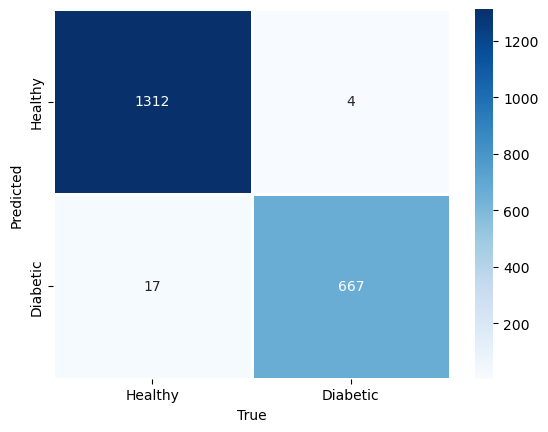

In [35]:
cf_matrix = confusion_matrix(y, y_pred)
df_cf_matrix = pd.DataFrame(cf_matrix, index=['Healthy', 'Diabetic'], columns=['Healthy', 'Diabetic'])

sns.heatmap(df_cf_matrix, linewidths=1, annot=True, fmt='g', cmap='Blues')

plt.xlabel('True')
a = plt.ylabel('Predicted')

print(classification_report(y, y_pred, zero_division=True, target_names=['Healthy', 'Diabetic']))

#### Very few False positive and negative

In [37]:
from sklearn.metrics import roc_curve
tprs = []
base_fpr = np.linspace(0, 1, 101)

Text(0.5, 0, 'False Positive Rate')

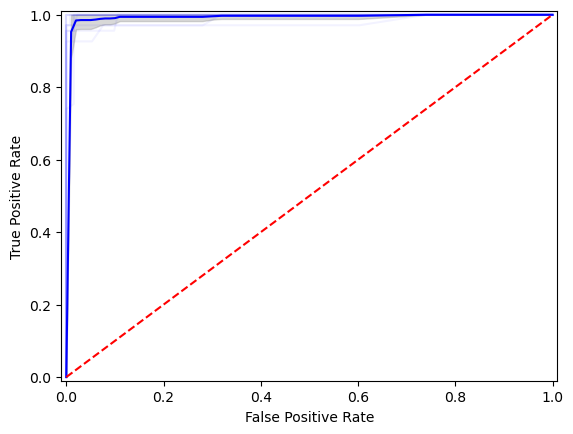

In [38]:
for train, test in cv.split(X, y):
    model = make_clf_pipeline(RandomForestClassifier(random_state=42, n_jobs=-1)).fit(X.values[train], y[train])
    y_score = model.predict_proba(X.values[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.05)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
    
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### As we can see its an almost perfect classifier